In [1]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd

URL_DATA = 'https://storage.data.gov.my/transportation/ktmb/ets_2025.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

print(df)

             date   time         origin     destination  ridership
0      2025-01-01  00:00     Batu Gajah      Alor Setar          1
1      2025-01-01  00:00     Batu Gajah            Arau          1
2      2025-01-01  00:00     Batu Gajah    Padang Besar          1
3      2025-01-01  00:00         Kampar    Padang Besar          2
4      2025-01-01  00:00  Tanjong Malim      Alor Setar          1
...           ...    ...            ...             ...        ...
191807 2025-05-24  23:00   Sungai Buloh   Tasek Gelugor          2
191808 2025-05-24  23:00        Taiping  Bukit Mertajam          2
191809 2025-05-24  23:00        Taiping    Parit Buntar          1
191810 2025-05-24  23:00  Tanjong Malim          Kampar          1
191811 2025-05-24  23:00     Tapah Road            Ipoh          1

[191812 rows x 5 columns]


In [2]:
df_grouped = df.groupby(['date','time'])['ridership'].sum().reset_index()

In [3]:
df_grouped.sort_values(by='ridership',ascending=False)

,date,time,ridership
1900,2025-03-28,18:00,1540
2102,2025-04-06,18:00,1500
2080,2025-04-05,18:00,1439
421,2025-01-20,08:00,1433
2893,2025-05-12,15:00,1407
...,...,...,...
2088,2025-04-06,02:00,1
3058,2025-05-21,02:00,1
529,2025-01-25,03:00,1
1686,2025-03-19,02:00,1


In [4]:
df_grouped.dtypes

date         datetime64[us]
time                 object
ridership             int64
dtype: object

In [5]:
df_grouped['time'] = pd.to_datetime(df_grouped['time'], format = "%H:%M").dt.time

In [6]:
df_grouped['Datetime'] = pd.to_datetime(df_grouped['date'].astype(str) + ' ' + df_grouped['time'].astype(str))

In [7]:
df_grouped.set_index('Datetime', inplace=True)

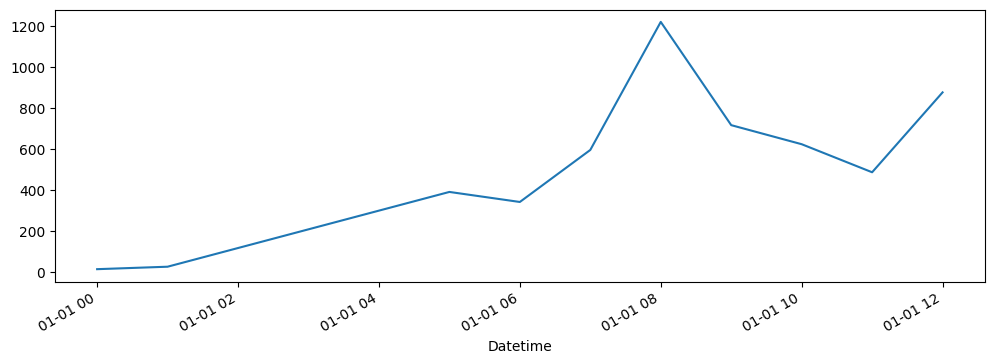

In [8]:
import matplotlib.pyplot as plt

df_grouped['ridership'].head(10).plot(figsize=(12,4))
plt.show()

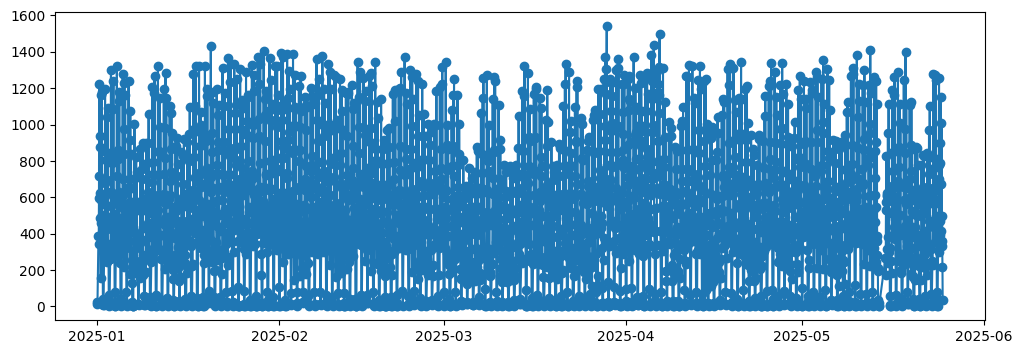

In [9]:
plt.figure(figsize=(12,4))
plt.plot(df_grouped.index, df_grouped['ridership'],marker='o', linestyle='-')
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_grouped['ridership'])
print("ADF: ", result[0])
print(f"p-value:  {result[1]:.2f}")

ADF:  -6.201415561324141
p-value:  0.00


Null hypothesis is rejected. The data is stationary

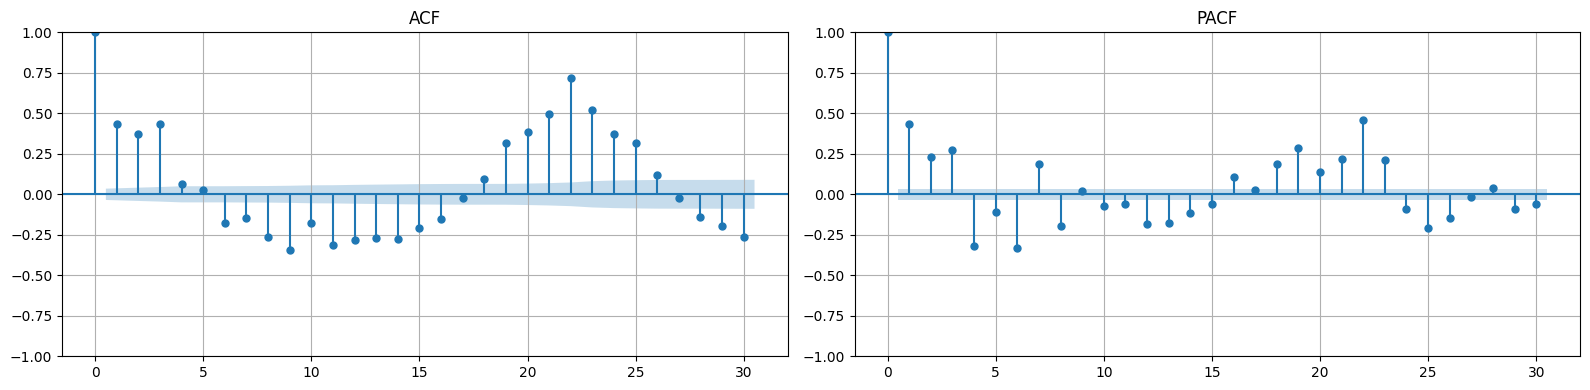

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,axes = plt.subplots(1,2, figsize=(16,4))

plot_acf(df_grouped['ridership'], lags=30, ax=axes[0])
axes[0].set_title("ACF")
axes[0].grid(True)

plot_pacf(df_grouped['ridership'], lags=30, ax=axes[1])
axes[1].set_title("PACF")
axes[1].grid(True)

plt.tight_layout()
plt.show()